In [1]:
import psutil
import os

import numpy as np
import matplotlib.pyplot as plt
from sandpile import *


def get_memory() -> float:
    """Return memory usage in MB"""
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss  # in bytes
    return memory_usage / (1024 ** 2)



100%|█████████▉| 99998/99999 [00:14<00:00, 6748.90it/s]


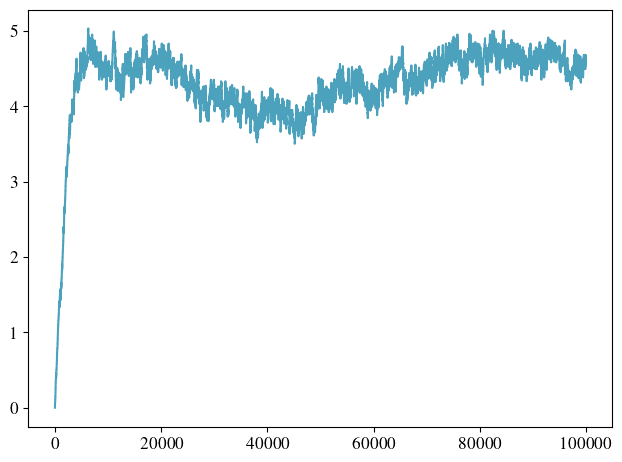

In [14]:
TIME_STEPS = 100_000
N = 10
system = SandpileND(2, N, 7)
system(TIME_STEPS)

plt.plot(range(TIME_STEPS), system.average_slopes)

system.save_data("test.data")


SandpileND(dimension=2, linear_grid_size=10, critical_slope=7, start_cfg=None)


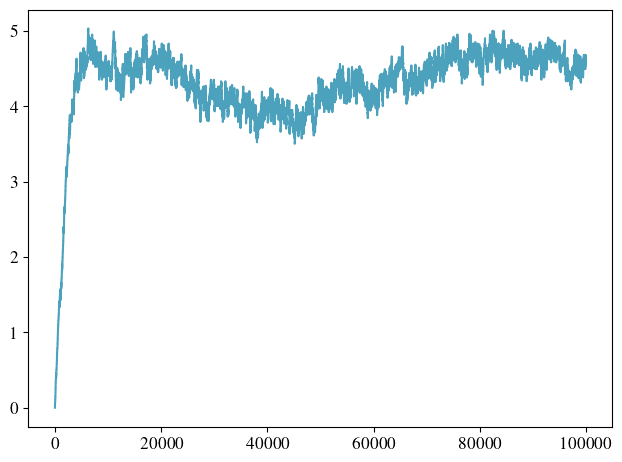

In [15]:
from sandpile import *
import matplotlib.pyplot as plt


system = SandpileND.load_from_file("test.data")
print(system)

plt.plot(range(TIME_STEPS), system.average_slopes)



(array([2.4608e+04, 1.1677e+04, 5.5870e+03, 3.7300e+03, 2.9360e+03,
        1.7120e+03, 3.3270e+03, 1.2910e+03, 1.2470e+03, 7.8800e+02,
        7.9000e+02, 6.1800e+02, 1.3300e+02, 2.8000e+01, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        , 10.83333333, 11.66666667,
        12.5       , 13.33333333, 14.16666667, 15.        , 15.83333333,
        16.66666667, 17.5       , 18.33333333, 19.16666667, 20.        ,
        20.83333333, 21.66666667, 22.5       , 23.33333333, 24.16666667,
        25.        ]),
 <BarContainer object of 30 artists>)

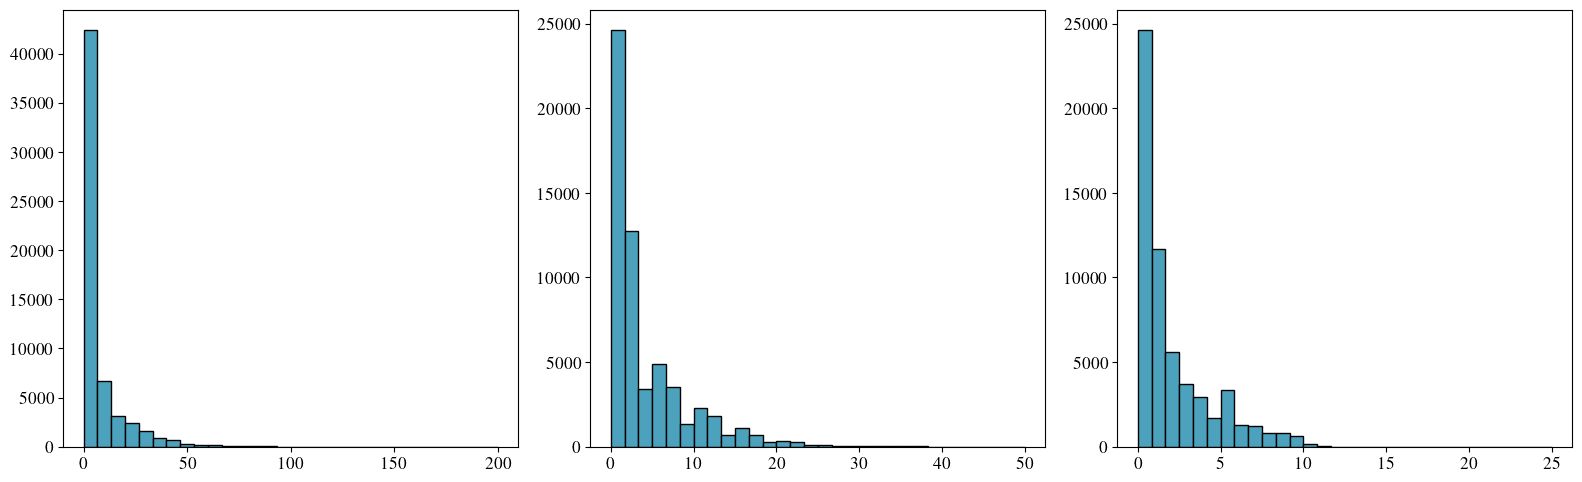

In [16]:

sizes = np.zeros(len(system.avalanches))
times = np.zeros(len(system.avalanches))
reach = np.zeros(len(system.avalanches))

for i, a in enumerate(system.avalanches):
    sizes[i] = a.size
    times[i] = a.time
    reach[i] = a.reach

plt.figure(0, figsize=(16, 5))

plt.subplot(131)
plt.hist(sizes, range=(0, 200), bins=30)

plt.subplot(132)
plt.hist(times, range=(0, 50), bins=30)

plt.subplot(133)
plt.hist(reach, range=(0, 25), bins=30)